**Marketing Analytics: Customer Segmentation**

**Data**

The data contains 2,205 observations and 39 columns.

The dataset includes customer demographics, purchase amounts, and campaign responses.


The data supports behavioral-based customer segmentation.

In [3]:
data = pd.read_csv('/content/ifood_df.csv', low_memory=False)

Data Preparation and Cleaning

-Looking for missing values

-Checking column types

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [4]:
print(data.head)

<bound method NDFrame.head of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                  

In [7]:
print(data.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


In [9]:
print(data.isna().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [10]:
print(data.info)

<bound method DataFrame.info of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                

In [11]:
print(data.describe)

<bound method NDFrame.describe of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1              

In [12]:
print(data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True))

None


In [13]:
features = data[['Income','Recency','MntWines','MntFruits','MntMeatProducts',
                 'NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']]

Scaling data for k-means

Income, recency, total spending, and product-wise purchases were used for clustering.


Selected features reflect customer value and engagement.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

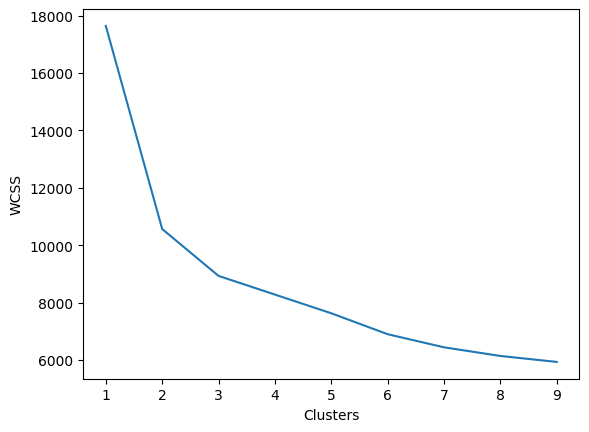

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


K-Means clustering grouped customers into distinct behavioral segments.

Customers naturally form separable groups based on purchase patterns.

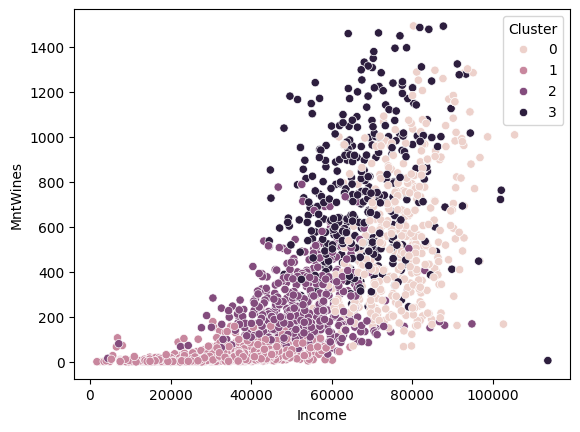

In [17]:
import seaborn as sns

sns.scatterplot(x=data['Income'], y=data['MntWines'], hue=data['Cluster'])
plt.show()


Scatter plots show clear separation between customer clusters.

Visualizations validate meaningful segmentation.

In [19]:
print(data.groupby('Cluster').mean())

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        76591.671296  0.034722  0.166667  49.356481  552.789352  80.192130   
1        32464.470199  0.811258  0.437086  48.439294   27.954746   4.338852   
2        52343.626305  0.367432  0.787056  50.158664  254.081420  16.098121   
3        67664.201031  0.126289  0.701031  48.533505  745.505155  30.757732   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             500.979167       102.800926         71.696759     78.747685   
1              18.230684         6.461369          4.596026     14.330022   
2              94.688935        26.390397         18.517745     49.682672   
3             222.208763        52.443299         40.750000     67.902062   

         ...  marital_Together  marital_Widow  education_2n Cy

High-income clusters spend more and respond better to campaigns.

Targeted marketing can increase revenue and retention.